Clustering With KMeans

In [1]:
""" 
Until now we look at supervised machine learning in which we know both inputs and outputs and using it we train our ML model.

Ex: SVM, Decision tree, Logistic, Random Forest

Now we look at unsupervised machine learning in which we only know inputs and we have to find structure to study its characteristics.

Ex: 
    - Let's we have set of documents, so for document classification we use clustering 
    - Used in fraud detection: In store, there are lots of transactions happening and we decide any particular transaction is fraud. So if do clustering, there are higher possibility of fraud transcation for other transaction which are in same cluster. 

K Means algorithm is unsupervised machine learning technique used to cluster data points. In this tutorial we will go over some theory behind how k means works and then solve income group clustering problem using sklearn, kmeans and python. 

Everyone can interpret dataset in different ways, so Elbow method is a technique used to determine optimal number of k.

In kmeans, k=2 tells algorithm to create 2 clusters

""" 

" \nUntil now we look at supervised machine learning in which we know both inputs and outputs and using it we train our ML model.\n\nEx: SVM, Decision tree, Logistic, Random Forest\n\nNow we look at unsupervised machine learning in which we only know inputs and we have to find structure to study its characteristics.\n\nEx: \n    - Let's we have set of documents, so for document classification we use clustering \n    - Used in fraud detection: In store, there are lots of transactions happening and we decide any particular transaction is fraud. So if do clustering, there are higher possibility of fraud transcation for other transaction which are in same cluster. \n\nK Means algorithm is unsupervised machine learning technique used to cluster data points. In this tutorial we will go over some theory behind how k means works and then solve income group clustering problem using sklearn, kmeans and python. \n\nEveryone can interpret dataset in different ways, so Elbow method is a technique u

In [2]:
from sklearn.cluster import KMeans
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

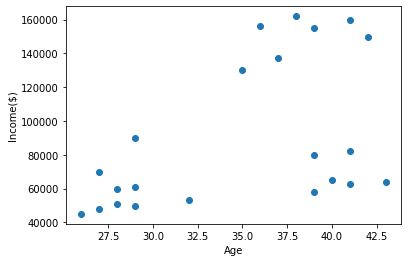

In [4]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
"fit_predict() -> Compute cluster centers and predict cluster index for each sample."

'fit_predict() -> Compute cluster centers and predict cluster index for each sample.'

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted # Here we get 3 clusters: 0,1 and 2

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [8]:
# Centroid of clusters
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

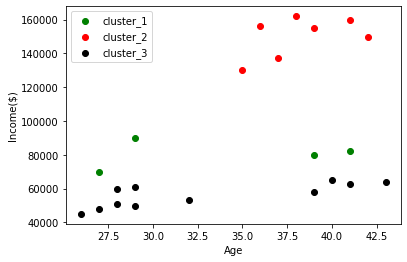

In [9]:
# Visualize clusters using scatter plot
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color="green")
plt.scatter(df2.Age, df2['Income($)'], color="red")
plt.scatter(df3.Age, df3['Income($)'], color="black")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['cluster_1', 'cluster_2', 'cluster_3'])

In [10]:
"""
We find that red cluster is okay, but black and green cluster are not okay because of scale problem

Using MinMaxScaler(Transform features by scaling each feature to a given range)
We normalise our value on scale of 0 to 1

km.cluster_centers_[:,0] and km.cluster_centers_[:,1] fetch the x and y coordinates of the centroids respectively.
"""

'\nWe find that red cluster is okay, but black and green cluster are not okay because of scale problem\n\nUsing MinMaxScaler(Transform features by scaling each feature to a given range)\nWe normalise our value on scale of 0 to 1\n\nkm.cluster_centers_[:,0] and km.cluster_centers_[:,1] fetch the x and y coordinates of the centroids respectively.\n'

In [11]:
# Preprocessing using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


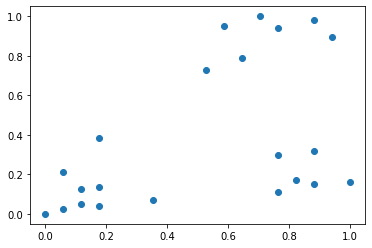

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted 

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

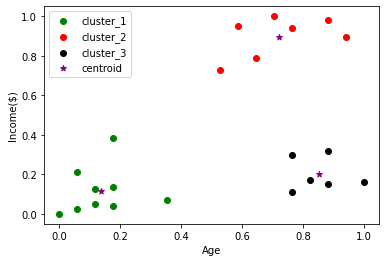

In [16]:
# Visualize clusters using scatter plot
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label="cluster_1")
plt.scatter(df2.Age,df2['Income($)'],color='red', label="cluster_2")
plt.scatter(df3.Age,df3['Income($)'],color='black', label="cluster_3")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [17]:
"""
Until now we have only two features, so by plotting 2D plot we find out value of k=3
For more feature, we use elbow plot to decide optimal value of k

km.inertia_ -> Calculate Sum of squared errors

"""

'\nUntil now we have only two features, so by plotting 2D plot we find out value of k=3\nFor more feature, we use elbow plot to decide optimal value of k\n\nkm.inertia_ -> Calculate Sum of squared errors\n\n'

Elbow Plot

In [18]:
sse= []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [19]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472493,
 0.17299621932455467,
 0.13265419827245162,
 0.10497488680620909]

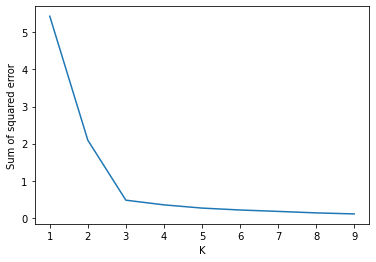

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [21]:
"We can clearly see that optimal value of k is 3 from above plot."

'We can clearly see that optimal value of k is 3 from above plot.'